## Análisis EDA: Licitación

### 1. Carga de datos

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [4]:
licitacion_df = pd.read_csv('../../data/Cleaned/cleaned_licitacion_data.csv')
licitacion_df.to_parquet('../../data/Cleaned/parquet_files/cleaned_licitacion_data.parquet')

In [5]:
licitacion_df = pd.read_parquet('../../data/Cleaned/parquet_files/cleaned_licitacion_data.parquet')

In [26]:
licitacion_df.shape

(567053, 23)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [7]:
licitacion_df.head()

,cve_expediente,procurementMethod,procurementMethod_rationale,status,title,description,has_enquiries,number_tenderers,tender_start_date,tender_end_date,award_start_date,award_end_date,enquiry_start_date,enquiry_end_date,procuring_entity_id,procuring_entity_name,value_currency_tender,value_amount_tender,award_criteria,framework_agreement,framework_agreement_platform,framework_agreement_title,submission_method
0,975480,direct,Art. 41 fr. III,complete,SERVICIO INTEGRAL DE ARRENDAMIENTO DE EQUIPO D...,"CONTRATO PLURIANUAL 2015 ¿ 2018, BAJO LA MODAL...",False,0,2015-12-29T21:21:00Z,None,None,2015-05-25 00:00:00+00:00,2015-12-29T21:21:00Z,None,AGN120124321-047EZN999,AGN-Dirección de Administración #047EZN999,None,NaN,None,None,None,None,electronicSubmission
1,999514,direct,Art. 41 fr. VII,complete,AA-019GYR026-E23-2016 SUMINISTRO E INSTALACION...,None,False,5,2016-02-12T13:34:00Z,None,None,2016-02-17 00:00:00+00:00,2016-02-12T13:34:00Z,None,IMS421231I45-050GYR026,IMSS-Coordinación de abastecimiento y equipami...,None,NaN,None,None,None,None,electronicSubmission
2,1004872,direct,Art. 42 párrafo primero,complete,MANTENIMIENTO AL PARQUE VEHICULAR DE OFICINA C...,MANTENIMIENTOPREVENTIVO Y CORRECTIVO AL PARQUE...,False,6,2016-02-22T13:31:00Z,None,None,2016-02-25 00:00:00+00:00,2016-02-22T13:31:00Z,None,LlC960821M84-008VST977,LICONSA-Gerencia de Recursos Materiales y Serv...,None,NaN,None,None,None,None,electronicSubmission
3,1016499,direct,Art. 42 párrafo segundo,complete,SERVICIO LEGALES,"SERVICIO DE ASUNTOS LABORALES, REVISIÓN JURÍDI...",False,0,2016-03-08T12:18:00Z,None,None,2015-12-29 00:00:00+00:00,2016-03-08T12:18:00Z,None,LlC960821M84-008VST977,LICONSA-Gerencia de Recursos Materiales y Serv...,None,NaN,None,None,None,None,inPerson
4,1036167,direct,Art. 42 párrafo primero,complete,ASEGURAMIENTO DE BIENES MUEBLES E INMUEBLES DE...,None,False,0,2016-05-09T14:00:00Z,None,None,2016-02-23 00:00:00+00:00,2016-05-09T14:00:00Z,None,IAA6210025R4-006A00996,INDAABIN-Unidad de Administración y Finanzas #...,None,NaN,None,None,None,None,inPerson


In [8]:
licitacion_df.tail()

,cve_expediente,procurementMethod,procurementMethod_rationale,status,title,description,has_enquiries,number_tenderers,tender_start_date,tender_end_date,award_start_date,award_end_date,enquiry_start_date,enquiry_end_date,procuring_entity_id,procuring_entity_name,value_currency_tender,value_amount_tender,award_criteria,framework_agreement,framework_agreement_platform,framework_agreement_title,submission_method
567048,2571345,open,None,active,Mantenimiento y Rehabilitación de obras civile...,Mantenimiento y Rehabilitación de obras civile...,False,0,2023-08-22T18:26:00Z,2023-09-11T16:00:00Z,2023-09-11T16:00:00Z,2023-09-22 00:00:00+00:00,2023-08-22T18:26:00Z,2023-08-28T16:00:00Z,CNA890116SF2-016B00985,CONAGUA-Gerencia de Recursos Materiales #016B0...,None,NaN,None,None,None,None,written
567049,2571346,open,None,active,Rehabilitación y mantenimiento de la Lumbrera ...,Rehabilitación y mantenimiento de la Lumbrera ...,False,0,2023-08-22T18:27:00Z,2023-09-11T10:00:00Z,2023-09-11T10:00:00Z,2023-09-22 00:00:00+00:00,2023-08-22T18:27:00Z,2023-08-28T10:00:00Z,CNA890116SF2-016B00985,CONAGUA-Gerencia de Recursos Materiales #016B0...,None,NaN,None,None,None,None,written
567050,2571413,open,None,complete,ADQUISICIÓN DE UNIFORMES PARA TRABAJADORES,ADQUISICIÓN DE UNIFORMES PARA TRABAJADORES DE...,False,0,2023-08-25T15:00:00Z,2023-08-30T14:30:00Z,2023-08-30T14:30:00Z,2023-06-12 00:00:00+00:00,2023-08-25T15:00:00Z,None,SAG941228M54-008000969,SADER-EDMUNDO ESTEFAN GARFIAS #008000969,MXN,13920.0,None,None,None,None,electronicSubmission
567051,2571516,open,None,active,Adquisición de Servicios de perforación de poz...,Adquisición de Servicios de perforación de poz...,False,0,2023-08-31T12:08:00Z,2023-10-16T10:00:00Z,2023-10-16T10:00:00Z,2023-11-10 00:00:00+00:00,2023-08-31T12:08:00Z,2023-09-19T10:00:00Z,IIE751125JEA-018T0K001,INEEL-Departamento de Adquisiciones #018T0K001,None,NaN,None,None,None,None,written
567052,2571566,selective,None,active,Servicio Administrado de Telefonía Local y Lar...,Servicio Administrado de Telefonía Local y Lar...,False,0,2023-09-01T19:41:00Z,2023-09-01T18:35:00Z,2023-09-01T18:35:00Z,2023-08-31 00:00:00+00:00,2023-09-01T19:41:00Z,None,AFA191017KH8-009E00999,AFAC-Dirección de Administración #009E00999,None,NaN,None,None,None,None,electronicSubmission


#### 2.2 Información General

In [9]:
licitacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567053 entries, 0 to 567052
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   cve_expediente                567053 non-null  int64  
 1   procurementMethod             567014 non-null  object 
 2   procurementMethod_rationale   511716 non-null  object 
 3   status                        567053 non-null  object 
 4   title                         567053 non-null  object 
 5   description                   544355 non-null  object 
 6   has_enquiries                 567053 non-null  bool   
 7   number_tenderers              567053 non-null  int64  
 8   tender_start_date             567053 non-null  object 
 9   tender_end_date               91830 non-null   object 
 10  award_start_date              91830 non-null   object 
 11  award_end_date                566994 non-null  object 
 12  enquiry_start_date            567053 non-nul

In [14]:
licitacion_df = licitacion_df.astype({
    'cve_expediente': 'string',
    'procurementMethod': 'string',
    'procurementMethod_rationale': 'string',
    'status': 'string',
    'title': 'string',
    'description': 'string',
    'has_enquiries': 'bool',
    'number_tenderers': 'int64',
    'tender_start_date': 'string',  # luego podemos convertirla a datetime
    'tender_end_date': 'string',    # luego podemos convertirla a datetime
    'award_start_date': 'string',   # luego podemos convertirla a datetime
    'award_end_date': 'string',     # luego podemos convertirla a datetime
    'enquiry_start_date': 'string', # luego podemos convertirla a datetime
    'enquiry_end_date': 'string',   # luego podemos convertirla a datetime
    'procuring_entity_id': 'string',
    'procuring_entity_name': 'string',
    'value_currency_tender': 'string',
    'value_amount_tender': 'float64',
    'award_criteria': 'string',
    'framework_agreement': 'string',
    'framework_agreement_platform': 'string',
    'framework_agreement_title': 'string',
    'submission_method': 'string'
})

licitacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567053 entries, 0 to 567052
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   cve_expediente                567053 non-null  string 
 1   procurementMethod             567014 non-null  string 
 2   procurementMethod_rationale   511716 non-null  string 
 3   status                        567053 non-null  string 
 4   title                         567053 non-null  string 
 5   description                   544355 non-null  string 
 6   has_enquiries                 567053 non-null  bool   
 7   number_tenderers              567053 non-null  int64  
 8   tender_start_date             567053 non-null  string 
 9   tender_end_date               91830 non-null   string 
 10  award_start_date              91830 non-null   string 
 11  award_end_date                566994 non-null  string 
 12  enquiry_start_date            567053 non-nul

In [15]:
# Si algunas columnas son fechas, podrías querer convertirlas a datetime posteriormente:
date_columns = [
    'tender_start_date', 'tender_end_date', 'award_start_date',
    'award_end_date', 'enquiry_start_date', 'enquiry_end_date'
]

for col in date_columns:
    licitacion_df[col] = pd.to_datetime(licitacion_df[col], errors='coerce')

licitacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567053 entries, 0 to 567052
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   cve_expediente                567053 non-null  string             
 1   procurementMethod             567014 non-null  string             
 2   procurementMethod_rationale   511716 non-null  string             
 3   status                        567053 non-null  string             
 4   title                         567053 non-null  string             
 5   description                   544355 non-null  string             
 6   has_enquiries                 567053 non-null  bool               
 7   number_tenderers              567053 non-null  int64              
 8   tender_start_date             567053 non-null  datetime64[ns, UTC]
 9   tender_end_date               91830 non-null   datetime64[ns, UTC]
 10  award_start_date    

#### 2.3 Estadísticas descriptivas

In [17]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = licitacion_df.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                                 count  unique  \
cve_expediente                  567053  567053   
procurementMethod               567014       3   
procurementMethod_rationale     511716      38   
status                          567053       3   
title                           567053  303859   
description                     544355  331572   
has_enquiries                   567053       1   
number_tenderers              567053.0     NaN   
tender_start_date               567053     NaN   
tender_end_date                  91830     NaN   
award_start_date                 91830     NaN   
award_end_date                  566994     NaN   
enquiry_start_date              567053     NaN   
enquiry_end_date                 67455     NaN   
procuring_entity_id             567052    1412   
procuring_entity_name           567052    1724   
value_currency_tender            70988       3   
value_amount_tender             9451.0     NaN   
award_criteria                   91781       3   


In [20]:
licitacion_df.describe()

,number_tenderers,value_amount_tender
count,567053.000000,9.451000e+03
mean,1.016064,2.591206e+07
std,3.650589,5.653681e+08
min,0.000000,1.000000e-02
25%,0.000000,7.277880e+05
50%,0.000000,1.898900e+06
75%,0.000000,5.657212e+06
max,135.000000,3.193440e+10


### 3. Análisis Univariado

#### 3.1 Variables Numéricas

number_tenderers

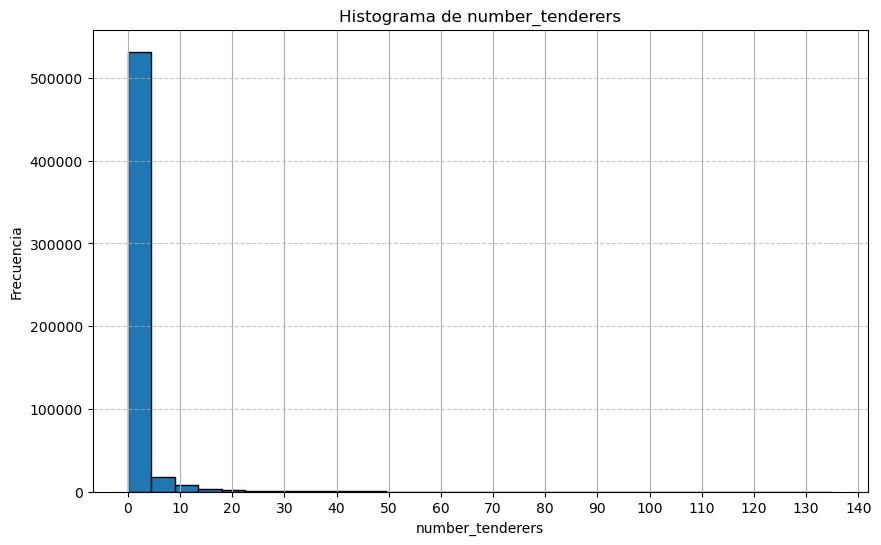

In [9]:
variable_numerica = 'number_tenderers'
if variable_numerica in licitacion_df.columns:
    plt.figure(figsize=(10, 6))
    licitacion_df[variable_numerica].hist(bins=30, edgecolor='black')
    plt.xlabel(variable_numerica)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + variable_numerica)
    
    # Set custom ticks for x-axis
    x_ticks = list(range(0, 141, 10))
    plt.xticks(x_ticks)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


value_amount_tender

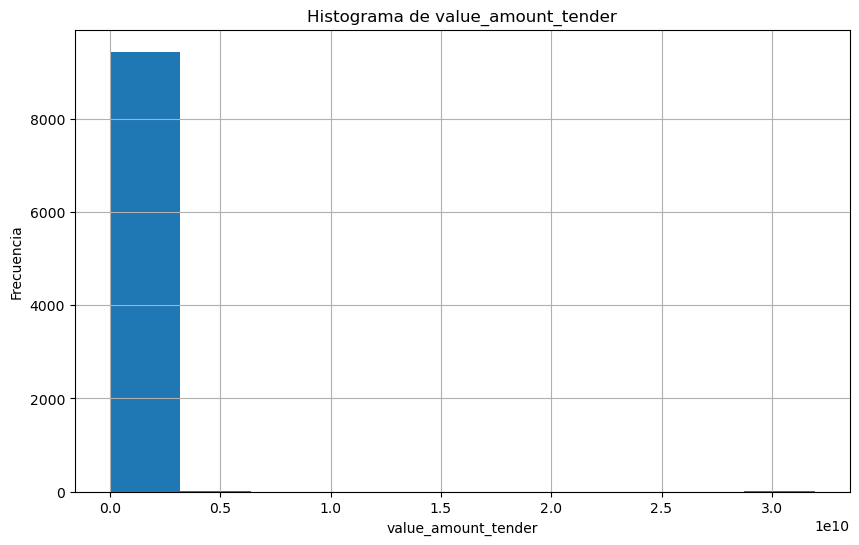

In [10]:
variable_numerica = 'value_amount_tender'
if variable_numerica in licitacion_df.columns:
    plt.figure(figsize=(10, 6))
    licitacion_df[variable_numerica].hist()
    plt.xlabel(variable_numerica)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + variable_numerica)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


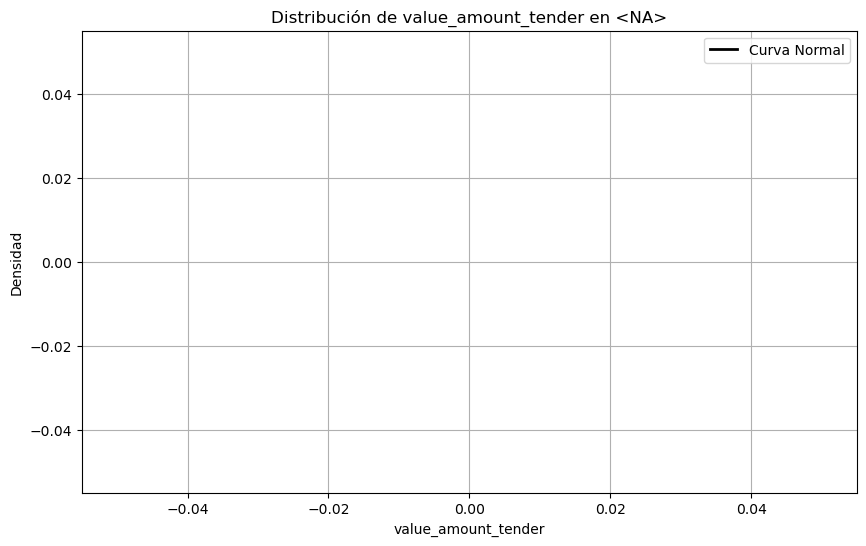

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


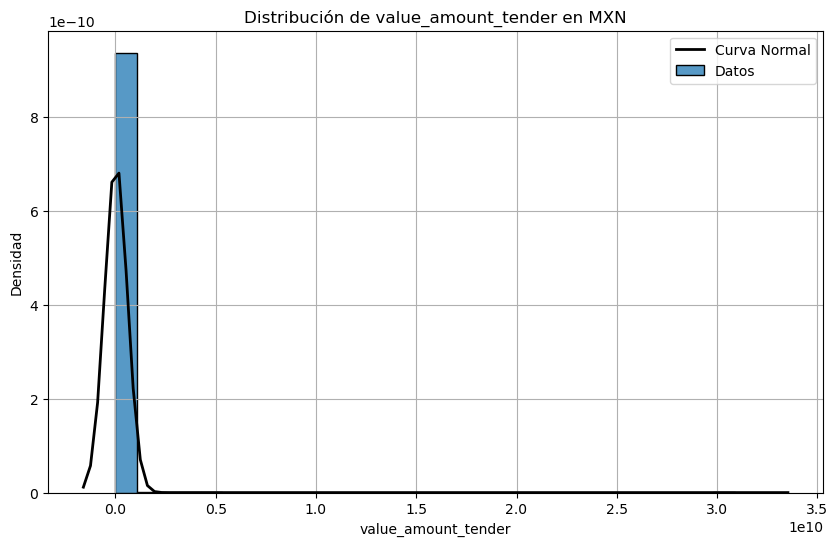

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


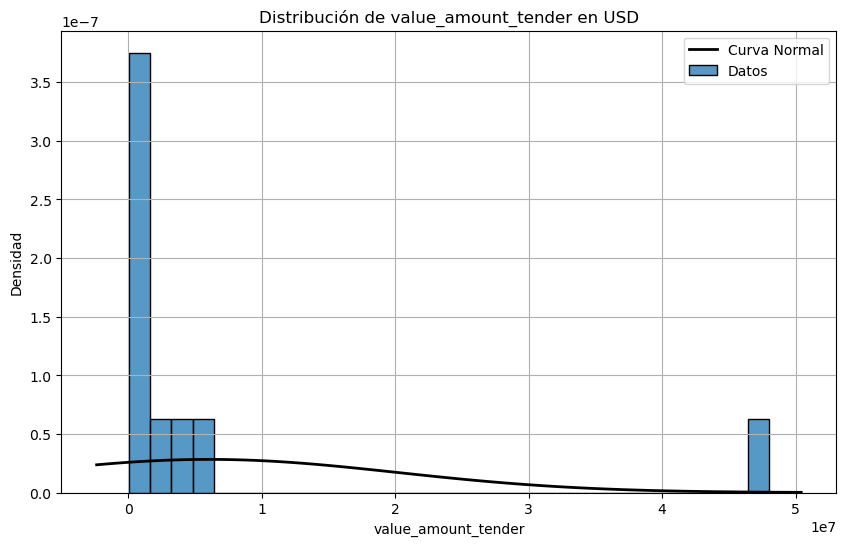

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


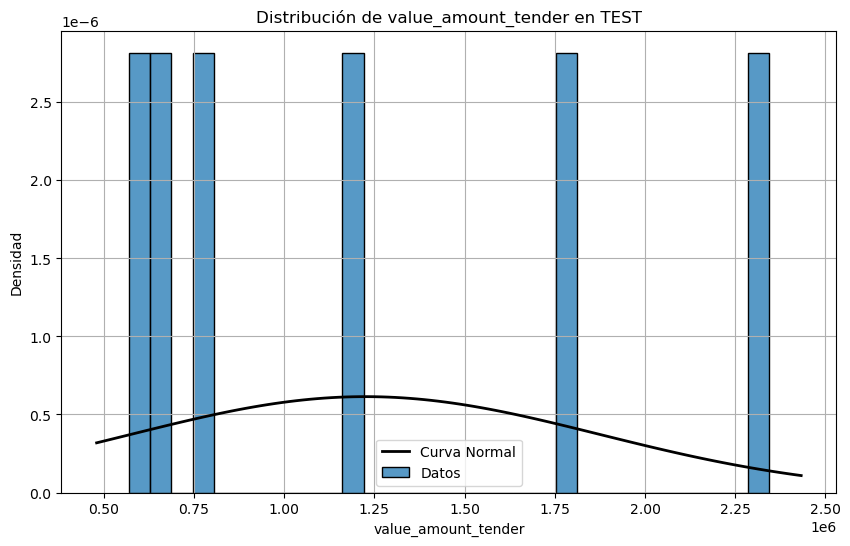

In [30]:
from scipy.stats import norm

# Supongamos que ya tienes el DataFrame cargado en 'licitacion_df'

# Filtrar las monedas únicas
monedas = licitacion_df['value_currency_tender'].unique()

# Crear una gráfica para cada moneda
for moneda in monedas:
    plt.figure(figsize=(10, 6))
    data = licitacion_df[licitacion_df['value_currency_tender'] == moneda]['value_amount_tender']
    sns.histplot(data, kde=False, stat="density", bins=30, label="Datos")
    
    # Ajustar una curva normal a los datos
    mu, std = norm.fit(data.dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label="Curva Normal")
    
    plt.title(f'Distribución de value_amount_tender en {moneda}')
    plt.xlabel('value_amount_tender')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()



### 3.2 Variables Categóricas

In [28]:
plt.figure(figsize=(10, 6))
    sns.histplot(data=licitacion_df[licitacion_df['value_currency_tender'] == "MXN"], x='value_amount_tender', kde=True)
    plt.title(f'Distribución de value_amount_tender en {moneda}')
    plt.xlabel('value_amount_tender')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

IndentationError: unexpected indent (527665738.py, line 2)

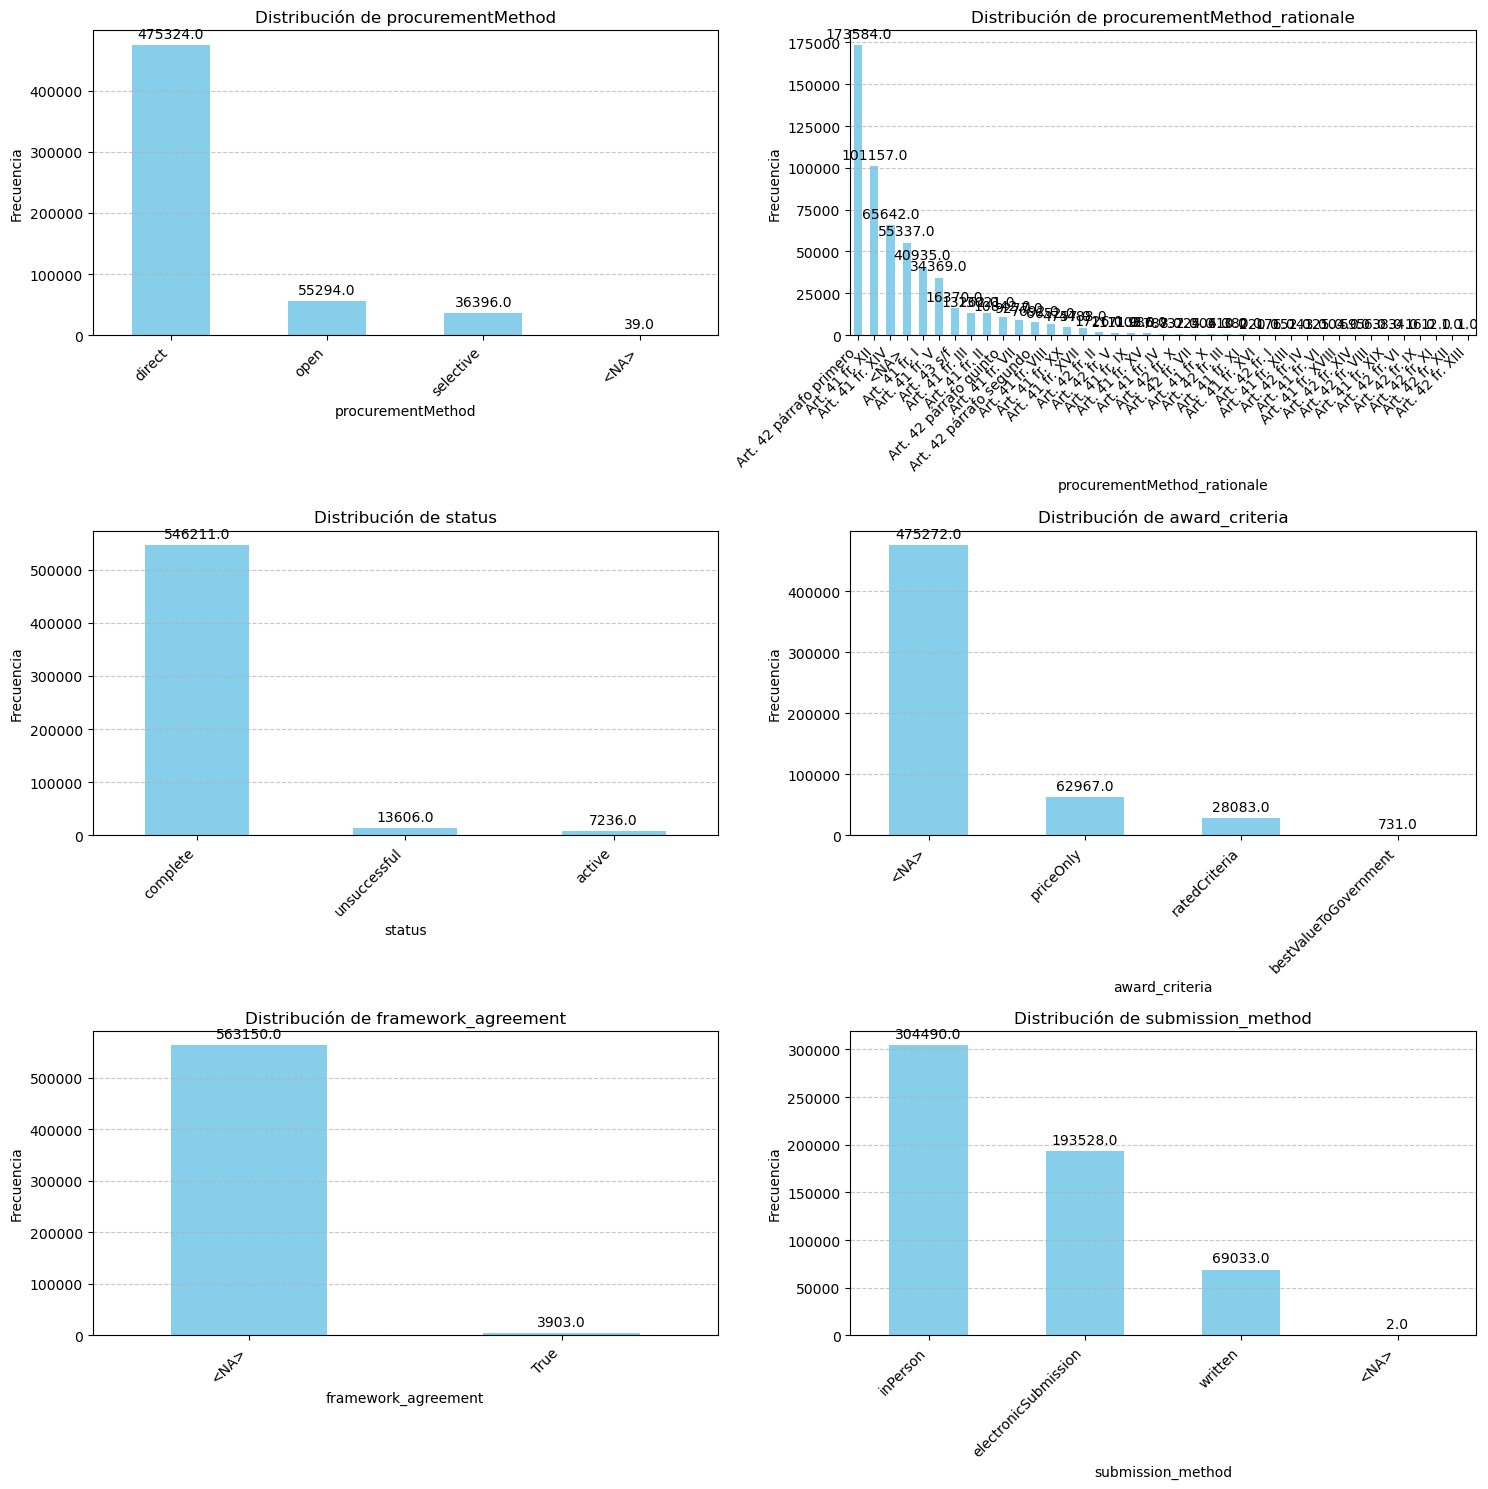

In [31]:
# Lista de columnas categóricas
categorical_columns = [
    'procurementMethod', 
    'procurementMethod_rationale', 
    'status',  
    'award_criteria', 
    'framework_agreement', 
    'submission_method'
]

# Función para graficar la distribución de variables categóricas
def plot_categorical_distribution(ax, df, column_name):
    value_counts = df[column_name].value_counts(dropna=False)
    bars = value_counts.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {column_name}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Añadir etiquetas a cada barra
    for bar in bars.containers[0]:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Definir el número de filas y columnas para los subplots
n_cols = 2
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre la lista de columnas categóricas y graficar sus distribuciones
for idx, col in enumerate(categorical_columns):
    if col in licitacion_df.columns:
        plot_categorical_distribution(axes[idx], licitacion_df, col)

# Eliminar cualquier subplot no utilizado
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño
plt.tight_layout()
plt.show()


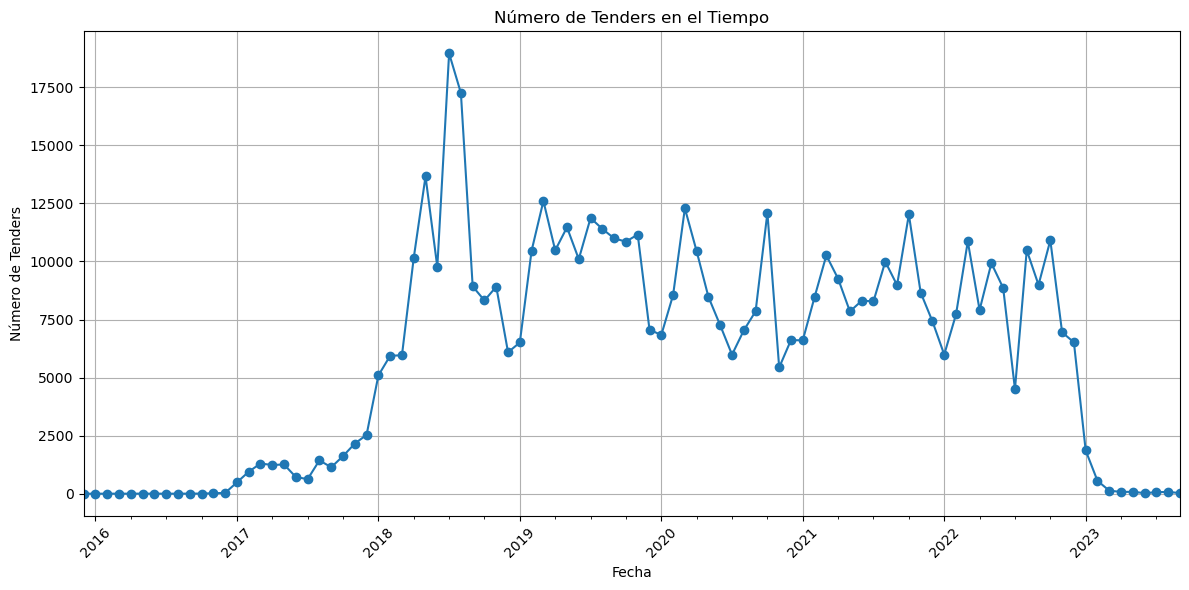

In [36]:
licitacion_df['tender_start_date'] = pd.to_datetime(licitacion_df['tender_start_date'], errors='coerce')

# Contar el número de tenders por mes
tenders_by_month = licitacion_df.resample('M', on='tender_start_date').size()

# Crear la gráfica
plt.figure(figsize=(12, 6))
tenders_by_month.plot(kind='line', marker='o')
plt.title('Número de Tenders en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Tenders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. Detección de Outliers

#### 5.1 IQR (Rango intercuartil)

In [12]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [13]:
# Detecting outliers in number_tenderers
outliers_number_tenderers = detect_outliers(licitacion_df, 'number_tenderers')
print(f"Outliers in 'number_tenderers': {len(outliers_number_tenderers)}")

Outliers in 'number_tenderers': 113960


In [14]:
# Detecting outliers in value_amount_tender
outliers_value_amount_tender = detect_outliers(licitacion_df, 'value_amount_tender')
print(f"Outliers in 'value_amount_tender': {len(outliers_value_amount_tender)}")

Outliers in 'value_amount_tender': 1222


#### 5.2 Box Plots

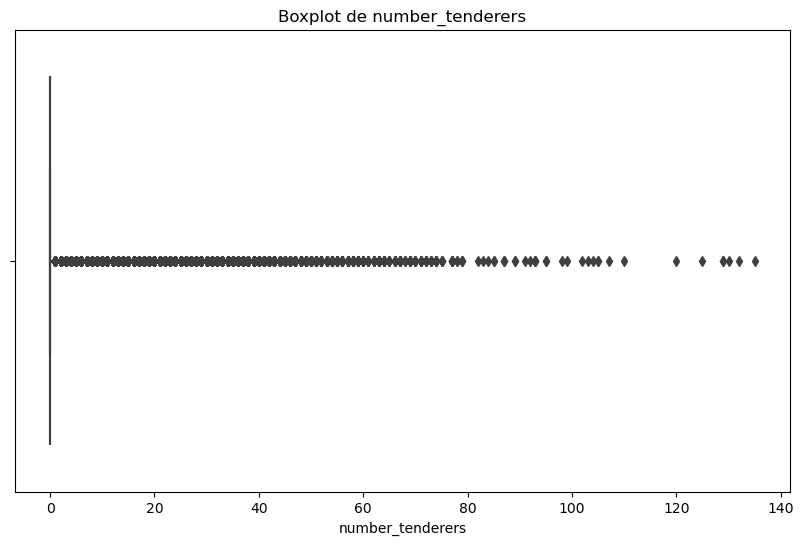

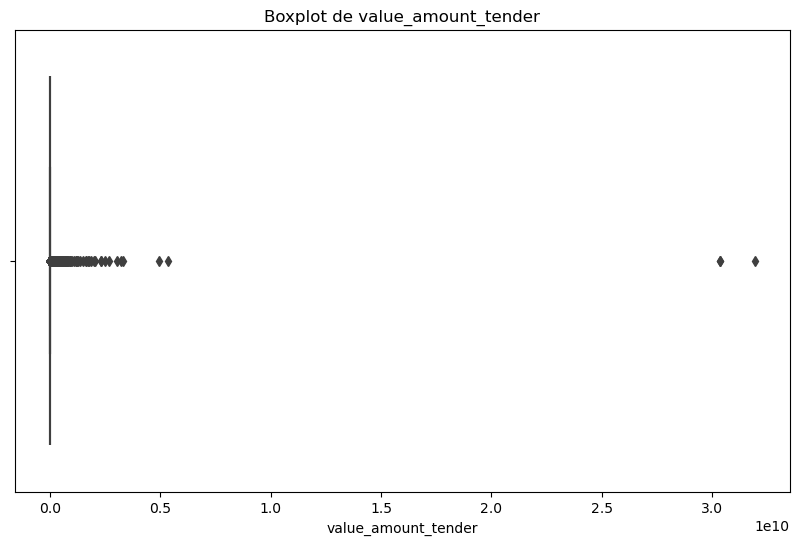

In [15]:
# Boxplot for number_tenderers
plt.figure(figsize=(10, 6))
sns.boxplot(x=licitacion_df['number_tenderers'])
plt.title('Boxplot de number_tenderers')
plt.show()

# Boxplot for value_amount_tender
plt.figure(figsize=(10, 6))
sns.boxplot(x=licitacion_df['value_amount_tender'])
plt.title('Boxplot de value_amount_tender')
plt.show()

### 6. Análisis Multivariado

#### 6.1 Matriz de correlación

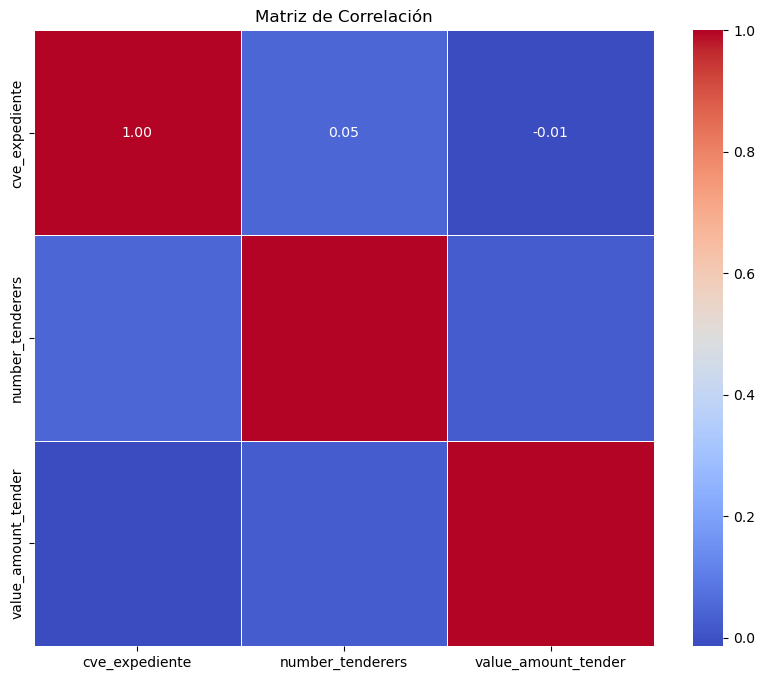

In [16]:
# Seleccionar las columnas numéricas
numeric_columns = licitacion_df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Configurar el título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()


### 7. Preguntas de Negocio

#### 7.1 ¿Cuántos expedientes por tipo de moneda?

value_currency_tender
None    496065
MXN      70804
USD        169
TEST        15
Name: count, dtype: int64


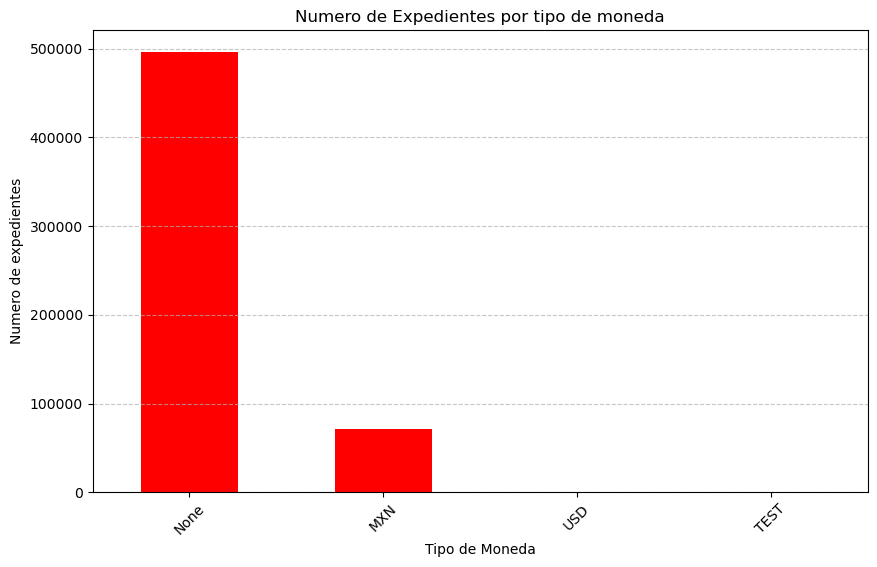

In [17]:
# Count expedientes by currency type, including None values
currency_counts = licitacion_df['value_currency_tender'].value_counts(dropna=False)
currency_counts.index = currency_counts.index.fillna('None')
print(currency_counts)

# Plot the distribution of expedientes by currency type, including None values
plt.figure(figsize=(10, 6))
currency_counts.plot(kind='bar', color='red')
plt.xlabel('Tipo de Moneda')
plt.ylabel('Numero de expedientes')
plt.title('Numero de Expedientes por tipo de moneda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 7.2 Para todos los tipos de procedimiento, el porcentaje de registros para cada tipo de estatus

procurementMethod     direct       open  selective
status                                            
active              0.235066  62.997788  36.767146
complete           87.019369   7.890030   5.090602
unsuccessful        0.161777  56.210015  43.628208


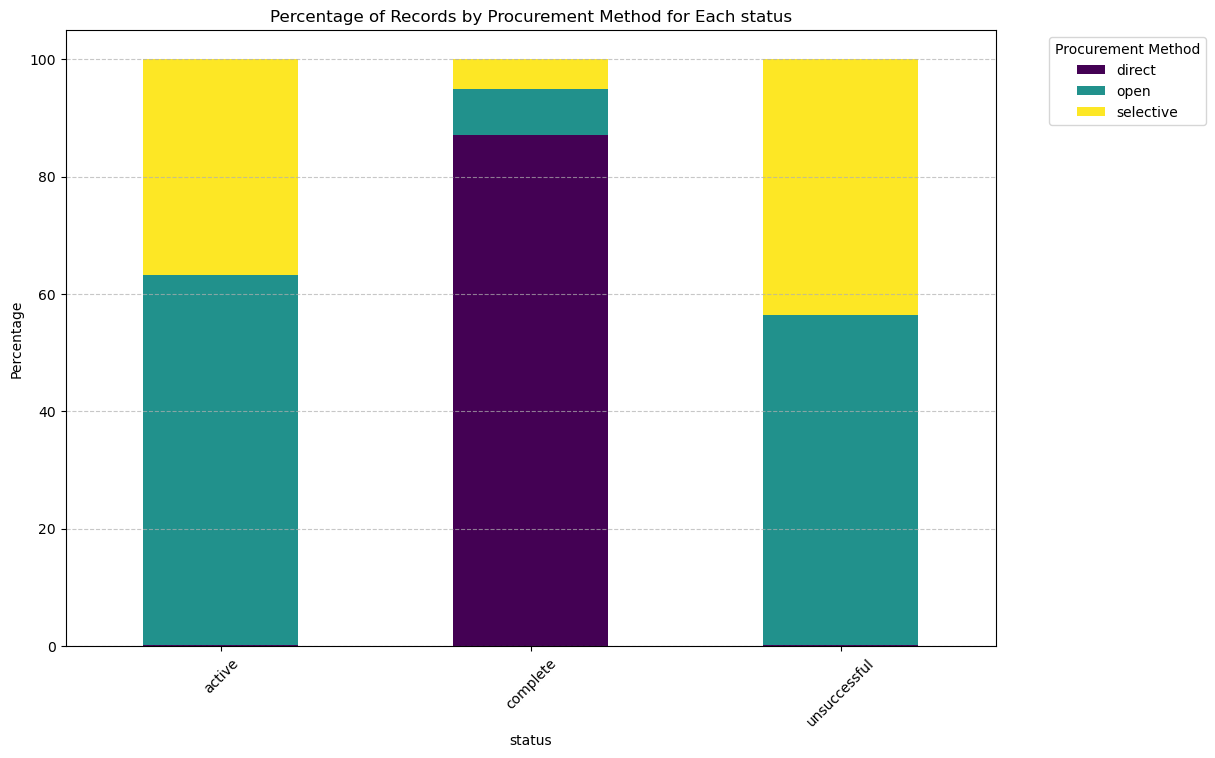

In [35]:
# Calculate percentage of each status for every procurement method

status_percentage = licitacion_df.groupby('status')['procurementMethod'].value_counts(normalize=True).unstack().fillna(0) * 100
print(status_percentage)

# Plot the percentage of each status for every procurement method
status_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('status')
plt.ylabel('Percentage')
plt.title('Percentage of Records by Procurement Method for Each status')
plt.legend(title='Procurement Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 7.3 Para tipos de procedimiento selective y open, el porcentaje de información sin valor en “number_tenderers”

Percentage of records with 'number_tenderers' = 0: 20.59%
Percentage of records with 'number_tenderers' != 0: 79.41%


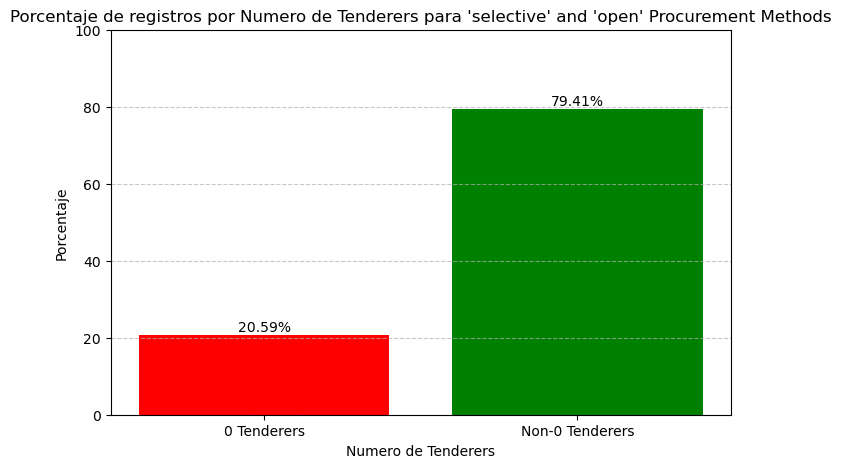

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for procurement methods 'selective' and 'open'
filtered_df = licitacion_df[licitacion_df['procurementMethod'].isin(['selective', 'open'])]

# Calculate the percentages
total_count = filtered_df.shape[0]
zero_tenderers_count = filtered_df[filtered_df['number_tenderers'] == 0].shape[0]
non_zero_tenderers_count = filtered_df[filtered_df['number_tenderers'] != 0].shape[0]

zero_tenderers_percentage = (zero_tenderers_count / total_count) * 100
non_zero_tenderers_percentage = (non_zero_tenderers_count / total_count) * 100

print(f"Percentage of records with 'number_tenderers' = 0: {zero_tenderers_percentage:.2f}%")
print(f"Percentage of records with 'number_tenderers' != 0: {non_zero_tenderers_percentage:.2f}%")

# Plotting the percentages
plt.figure(figsize=(8, 5))
plt.bar(['0 Tenderers', 'Non-0 Tenderers'], [zero_tenderers_percentage, non_zero_tenderers_percentage], color=['red', 'green'])
plt.xlabel('Numero de Tenderers')
plt.ylabel('Porcentaje')
plt.title("Porcentaje de registros por Numero de Tenderers para 'selective' and 'open' Procurement Methods")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the bars with the percentage values
for index, value in enumerate([zero_tenderers_percentage, non_zero_tenderers_percentage]):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')

plt.show()


#### 7.4 Para procedimientos de adjudicación directa, el porcentaje de información sin valor en “procurementMethod_rationale”

Percentage of missing or empty 'procurementMethod_rationale': 0.00%


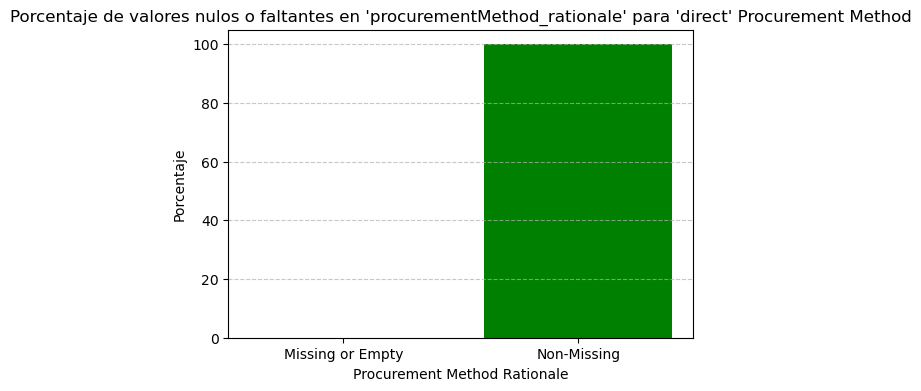

In [20]:
# Filter for procurement method 'direct'
direct_df = licitacion_df[licitacion_df['procurementMethod'] == 'direct']

# Calculate the percentage of missing or empty values in 'procurementMethod_rationale'
missing_rationale_percentage = (direct_df['procurementMethod_rationale'].isna() | (direct_df['procurementMethod_rationale'] == '')).mean() * 100
print(f"Percentage of missing or empty 'procurementMethod_rationale': {missing_rationale_percentage:.2f}%")

# Visualize the percentage of missing or empty values in 'procurementMethod_rationale'
plt.figure(figsize=(6, 4))
plt.bar(['Missing or Empty', 'Non-Missing'], [missing_rationale_percentage, 100 - missing_rationale_percentage], color=['red', 'green'])
plt.xlabel('Procurement Method Rationale')
plt.ylabel('Porcentaje')
plt.title("Porcentaje de valores nulos o faltantes en 'procurementMethod_rationale' para 'direct' Procurement Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 